# Pattern Recognition 2022-23 1st Lab: Optical Digit Recognition<br>

Ηλιόπουλος Γεώργιος: 03118815 <br>
Σερλής Αναστάσιος Εμανουήλ - 03118125<br>
<br>
Προπαρασκευή

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import KFold, learning_curve, ShuffleSplit, cross_validate, train_test_split
%matplotlib inline
from matplotlib.cm import rainbow
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings("ignore")

#### Βήμα 1: Εισαγωγή των δεδομένων 

In [2]:
def read_data (file):
    df = pd.read_csv(file, sep=" ", header = None) #read txt file as panda data frame
    df = df.to_numpy() #convert to numpy array
    labels = df[:, 0] #keep first column, where the labels are
    data = df[:, 1:257] #keep the other columns, where the 256 features are
    print ("There are {} samples with {} features each.".format(len(df[:, 0]), df[:, 1:257].shape[1]))
    return data, labels

In [3]:
X_train, y_train = read_data("./data/train.txt")
X_test, y_test = read_data("./data/test.txt")

There are 7291 samples with 256 features each.
There are 2007 samples with 256 features each.


In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7291, 256) (7291,) (2007, 256) (2007,)


#### Βήμα 2: Απεικόνιση 131ου ψηφίου

Text(0.5, 1.0, '131th digit')

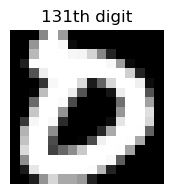

In [5]:
fig = plt.figure(figsize=(2,2))
plt.axis('off')
im = X_train[130].reshape(16, 16) # reshaping to form a 16x16 grid 
plt.imshow(im, "gray")
plt.title("131th digit")

#### Βήμα 3: Απεικόνιση ενός τυχαίου δείγματος από κάθε κλάση

In [6]:
y = []
for i in range(9):
    y.append(i)
    y[i] = []

In [7]:
samples = [] # initializing a list
for i in range(10):
    samples.append(i)
    samples[i] = [] # initializing each element as a list
    
# saving the pixels of each digit in the list y
# for example all the pixels of all digits '7' are saved in y[7]
for z in range(10):
    samples[z] = X_train[y_train == z]

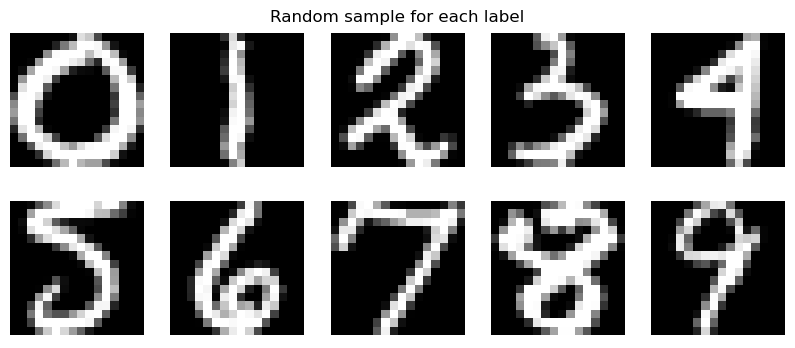

In [8]:
fig = plt.figure(figsize=(10,4))
plt.title("Random sample for each label")
plt.axis('off')
for i in range(10):
    z = random.randint(0, len(samples[i]) - 1) #getting a ramdom sample of each digit
    im = samples[i][z].reshape(16, 16)
    fig.add_subplot(2,5,i+1)
    plt.imshow(im, "gray")
    plt.axis('off')

#### Βήμα 4: Υπολογισμός μέση τιμής του pixel (10, 10) των μηδενικών

In [9]:
a1 = np.mean(samples[0][:,10*16+10-1])  # samples[0] is a np.array wich contains all the samples '0', so
                                        # we calculate the mean value of all '0' samples in the (10*16+10-1)th
                                        # column, considering 1-based indexing, where the pixel (10, 10) is
print("The mean value of the pixel (10,10) for all the '0' samples in the train set is {}.".format(a1))

The mean value of the pixel (10,10) for all the '0' samples in the train set is -0.8568450586264656.


#### Βήμα 5: Υπολογισμός διασποράς του pixel (10, 10) των μηδενικών

In [10]:
a2 = np.var(samples[0][:,10*16+10-1])
print("The varience of the pixel (10,10) for all the '0' samples in the train set is {}.".format(a2))

The varience of the pixel (10,10) for all the '0' samples in the train set is 0.16989574064978716.


#### Βήμα 6: Υπολογισμός μέσης τιμής και διασποράς όλων των pixel όλων των μηδενικών

In [11]:
samples_mean = [] # initializing a list to save the mean values of each class
samples_var = [] # initializing a list to save the varience values of each class
for i in range(10):
    samples_mean.append(i)
    samples_var.append(i)
    samples_mean[i] = [] # initializing each element as a list
    samples_var[i] = []

In [12]:
samples_mean[0] = np.mean(samples[0], axis=0)
samples_var[0] = np.var(samples[0], axis=0)

#### Βήμα 7: Απεικόνιση μέσης τιμής των μηενικών

Text(0.5, 1.0, "Mean Value of class '0'")

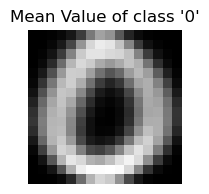

In [13]:
fig = plt.figure(figsize=(2,2))
plt.axis('off')
im = samples_mean[0].reshape(16, 16)
plt.imshow(im, "gray")
plt.title("Mean Value of class '0'")

#### Βήμα 8: Απεικόνιση διασποράς των μηδενικών

Text(0.5, 1.0, "Varience Value of class '0'")

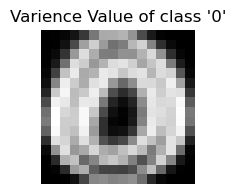

In [14]:
fig = plt.figure(figsize=(2,2))
plt.axis('off')
im = samples_var[0].reshape(16, 16)
plt.imshow(im, "gray")
plt.title("Varience Value of class '0'")

#### Βήμα 9: Υπολογισμός και απεικόνιση μέσης τιμής και διασποράς όλων κλάσεων

In [15]:
for i in range(10):
    samples_mean[i] = np.mean(samples[i], axis=0)
    samples_var[i] = np.var(samples[i], axis=0)

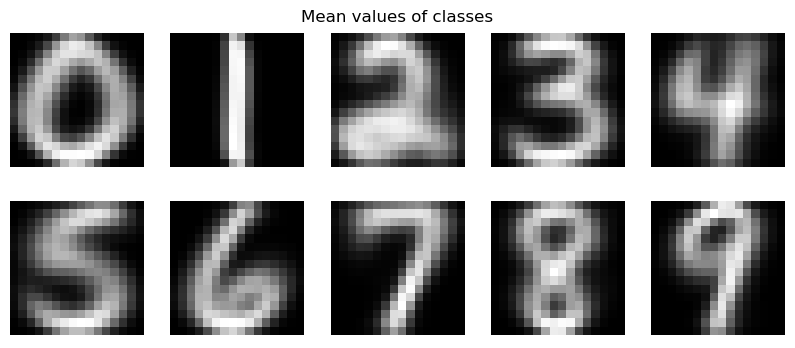

In [16]:
fig = plt.figure(figsize=(10,4))
plt.title("Mean values of classes")
plt.axis('off')
for i in range(10):
    im = samples_mean[i].reshape(16, 16)
    fig.add_subplot(2,5,i+1)
    plt.imshow(im, "gray")
    plt.axis('off')

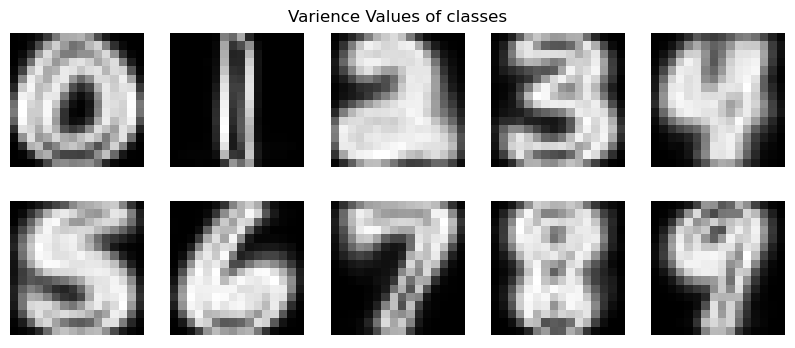

In [17]:
fig = plt.figure(figsize=(10,4))
plt.title("Varience Values of classes")
plt.axis('off')
for i in range(10):
    im = samples_var[i].reshape(16, 16)
    fig.add_subplot(2,5,i+1)
    plt.imshow(im, "gray")
    plt.axis('off')

#### Βήμα 10: Ταξινόμηση του 101ου ψηφίου του test set βάσει του ευκλείδειου ταξινομητή

The digit we want to classify is the 101th didgit of the test set and as we can see below it is a '0'.
The euclidean classifier classifies it as a '0' which is True.


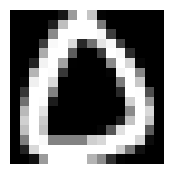

In [18]:
digit = 101

dist = np.linalg.norm(samples_mean - X_test[digit-1], ord=None, axis=1) 
# linag.norm with ord=None calculates the 2-norm wich is equal to the euclidean distance, 
# it returns the euclidean diastance between the test digit and ecah digits mean values

pred = np.argmin(dist) #returns the index of the minimum dist wich is the prediction

print("The digit we want to classify is the {}th didgit of the test set and as \
we can see below it is a '{}'.".format(digit, int(y_test[digit-1])))

fig = plt.figure(figsize=(2,2))
plt.axis('off')
im = X_test[digit-1].reshape(16, 16)
plt.imshow(im, "gray")

print("The euclidean classifier classifies it as a '{}' which is {}.".format(pred, str(pred == y_test[digit-1])))

#### Βήμα 11: Ταξινόμηση όλων των ψηφίων βάσει του ευκλείδειου ταξινομητή και υπολογισμός ποσοστού επιτυχίας

In [19]:
# function that calculates the minimum Euclidean Distance --> It predicts the class
def min_euclidean_distance(i):
    p = np.argmin(np.linalg.norm((i - samples_mean), ord=None, axis=1))
    return p

In [20]:
predicts = [] #initializing a list to save the predictions of each test sample
for i in range(len(y_test)):
    predicts.append(min_euclidean_distance(X_test[i])) 

In [21]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predicts[i]:
        count += 1 # counting how many correct predictions the classifier made

acc1 = count / len(y_test)

print("The accuracy of the euclidean classifier is {:.2f}%.".format(acc1 * 100))

The accuracy of the euclidean classifier is 81.42%.


#### Βήμα 12: Υλοποίηση του ευκλείδειου ταξινομητή ως μία κλάση σαν ένα scikit-learn estimator

In [22]:
class EuclideanDistanceClassifier(BaseEstimator, ClassifierMixin):
    """Classify samples based on the distance from the mean feature value"""

    def __init__(self):
        self.X_mean_ = None


    def fit(self, X, y):
        """
        This should fit classifier. All the "work" should be done here.
        Calculates self.X_mean_ based on the mean
        feature values in X for each class.
        self.X_mean_ becomes a numpy.ndarray of shape
        (n_classes, n_features)
        fit always returns self.
        """
        n_classes = len(np.unique(y)) #calculate how many different classes there are
        n_samples, n_features = X.shape #saving how many features there are
        self.X_mean_ = np.zeros((n_classes, n_features)) #initialing a np array for X_mean_
        
        samples = [] # initializing a list to save thw features of each sample divided in classes
        for i in range(n_classes):
            samples.append(i)
            samples[i] = [] # initializing each element as a list

        for i in range(n_classes):
            samples[i] = X[y == i] #seperating the samples in classes
            
        for i in range(n_classes):
            self.X_mean_[i, :] = np.mean(samples[i], axis=0) # calculating the mean values of each class
        
        return self

    def predict(self, X):
        """
        Make predictions for X based on the
        euclidean distance from self.X_mean_
        """
        predicts = []
        for i in range(len(X)):
            predicts.append(np.argmin(np.linalg.norm((X[i] - self.X_mean_), ord=None, axis=1))) # makes the prediction
        predicts = np.array(predicts)
        return predicts

    def score(self, X, y):
        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """
        count = 0
        y_pred = self.predict(X)
        for i in range(len(y)):
            if y[i] == y_pred[i]:
                count += 1 # countng the correct predictions
        acc = count / len(y)
        return acc

#### Βήμα 13 

#### α) Υπολογισμός score του ευκλείδειου ταξινομητή με χρήση 5-fold cross-validation

In [23]:
clf = EuclideanDistanceClassifier()
resutls = cross_validate(clf, X_train, y = y_train, cv = 5, return_train_score = True, scoring = ['accuracy'])
acc2 = resutls["train_accuracy"].mean() * 100
print("The score of the Euclidean Classifie with 5-fold cross-validation is \
{:.2f}%.\nBefore 5-fold cross-validation it was {:.2f}%.\nSo it is more by {:.2f}%.".format(acc2, acc1, acc2 - acc1))

The score of the Euclidean Classifie with 5-fold cross-validation is 85.14%.
Before 5-fold cross-validation it was 0.81%.
So it is more by 84.33%.


#### β) Περιοχές απόφασης του ευκλείδειου ταξινομητή

In [24]:
#b

def plot_clf(clf, X, y, labels, title = "Decision Surfaces", dots = "on"): 
# parameter dots specifies if we will plot the samples or not
    fig, ax = plt.subplots()
    
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                         np.arange(y_min, y_max, .05))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    out = ax.contourf(xx, yy, Z + 0.5, cmap=plt.cm.coolwarm, alpha=0.8)
       
    colors = rainbow(np.linspace(0, 1, len(labels)))
    
    # we dont always plot the samples to see better the decision surfaces
    if dots == "on":
        for i in range(10):
            zeros = ax.scatter(
                X0[y == i], X1[y == i],
                c=colors[i], label=labels[i],
                s=60, alpha=0.8, edgecolors='k')
        ax.legend()
        title = "Decision Surfaces and Samples"
        
    #ax.set_ylabel("Main Component 1")
    #ax.set_xlabel("Main Component 2")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

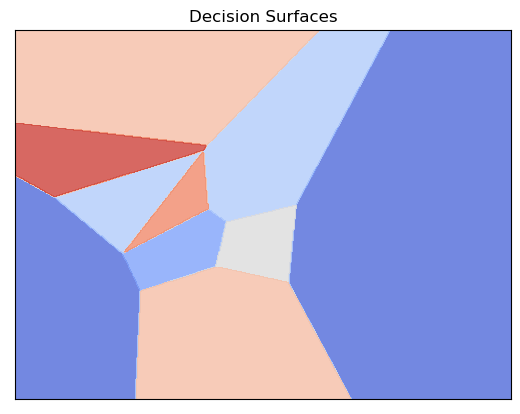

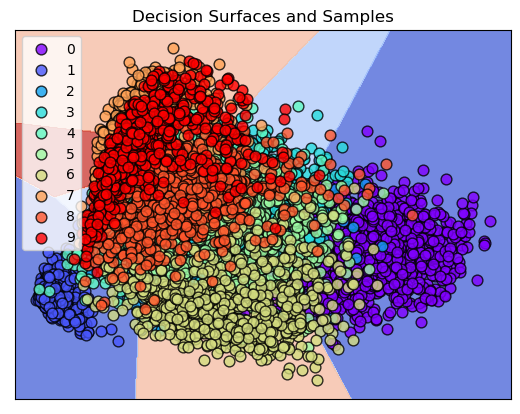

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)   # reducing the dimetions 
pca.fit(X_train)
X_new = pca.transform(X_train)

eucl_new = EuclideanDistanceClassifier()  # fiting a new classifier with the reduced 2 features
eucl_new.fit(X_new, y_train)

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plot_clf(eucl_new, X_new, y_train, labels, dots = y)
plot_clf(eucl_new, X_new, y_train, labels)

#### γ) Καμπύλη εκμάθησης του ευκλείδειου ταξινομητή (learning curve)

<module 'matplotlib.pyplot' from 'C:\\Users\\grgsl\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

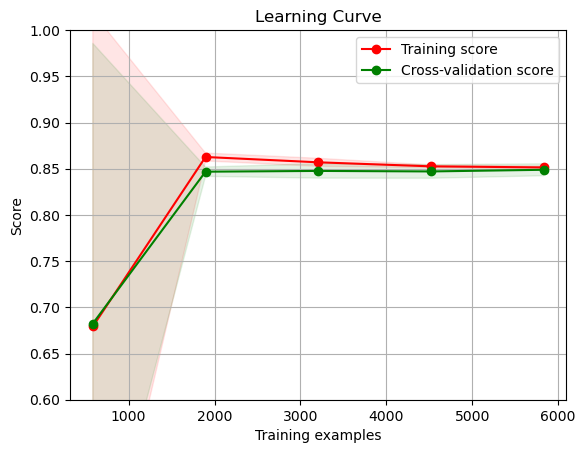

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    EuclideanDistanceClassifier(), X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5))

def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 1)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(.6, 1))